In [11]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [12]:
#loading data
DDataFile = './D_VLOS_scaled_mean_mean_alpha6_fft_abs_Frobenius_sphericalWave_B32_U20000.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = './randLocationU20000VIP.mat'
locationData = sio.loadmat(LocationDataFile)


In [33]:
#preprocessing the data
D_data = DData['D']
location_data = locationData['location']
location_data = location_data[:2,:]

l, total = D_data.shape
d, total = location_data.shape

train_length = int(np.floor(total * 0.8))

impulses_train = np.transpose(D_data[:, :train_length])
location_train = np.transpose(location_data[:,:train_length])

impulses_test = np.transpose(D_data[:, train_length:])
location_test = np.transpose(location_data[:,train_length:])

In [34]:
#Build the model
model = keras.Sequential()

keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
#model.add(Dropout(0.2)) # best 0.2
keras.layers.Conv2D(1024, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

# keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
# model.add(Dropout(0.2)) # best 0.2
# keras.layers.Conv2D(2048, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
# keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.25)) # best 0.2
model.add(Dense(256, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

# keras.layers.normalization.BatchNormalization()
# model.add(Dropout(0.25)) # best 0.2
# model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [36]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.05) #'Adam'  lr=0.2  #  RMSprop(overfiiting) sgd(overfitting)  Adadelta(overfitting)   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func,
             metrics = ['mae'])

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [37]:
#Train the model, iterating
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 20, # 10,20
                    epochs = 200,
                    verbose = 2,
                   # callbacks=[early_stop], 
                    validation_split = 0.2 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 12800 samples, validate on 3200 samples
Epoch 1/200
 - 3s - loss: 7575.7100 - mean_absolute_error: 62.3345 - val_loss: 3474.1718 - val_mean_absolute_error: 45.8574
Epoch 2/200
 - 2s - loss: 3705.6158 - mean_absolute_error: 46.1920 - val_loss: 2617.3436 - val_mean_absolute_error: 39.3137
Epoch 3/200
 - 2s - loss: 3359.1022 - mean_absolute_error: 43.9427 - val_loss: 2460.5902 - val_mean_absolute_error: 38.0856
Epoch 4/200
 - 2s - loss: 3106.5566 - mean_absolute_error: 42.3259 - val_loss: 2430.9735 - val_mean_absolute_error: 37.3337
Epoch 5/200
 - 2s - loss: 2898.1510 - mean_absolute_error: 40.9414 - val_loss: 2258.7255 - val_mean_absolute_error: 36.8904
Epoch 6/200
 - 2s - loss: 2704.1810 - mean_absolute_error: 39.5027 - val_loss: 2205.7211 - val_mean_absolute_error: 35.6736
Epoch 7/200
 - 3s - loss: 2610.3396 - mean_absolute_error: 38.8463 - val_loss: 2267.7796 - val_mean_absolute_error: 36.5924
Epoch 8/200
 - 3s - loss: 2498.3191 - mean_absolute_error: 37.8798 - val_loss: 2064

Epoch 67/200
 - 3s - loss: 1428.4108 - mean_absolute_error: 28.7836 - val_loss: 1765.0770 - val_mean_absolute_error: 31.9971
Epoch 68/200
 - 3s - loss: 1454.3056 - mean_absolute_error: 29.0328 - val_loss: 1910.2485 - val_mean_absolute_error: 33.0643
Epoch 69/200
 - 3s - loss: 1427.6608 - mean_absolute_error: 28.7396 - val_loss: 1893.2983 - val_mean_absolute_error: 33.0165
Epoch 70/200
 - 3s - loss: 1451.5405 - mean_absolute_error: 28.9931 - val_loss: 1639.5374 - val_mean_absolute_error: 30.7672
Epoch 71/200
 - 3s - loss: 1410.5802 - mean_absolute_error: 28.5675 - val_loss: 1727.5165 - val_mean_absolute_error: 31.4231
Epoch 72/200
 - 3s - loss: 1428.6119 - mean_absolute_error: 28.5717 - val_loss: 1964.1143 - val_mean_absolute_error: 33.5303
Epoch 73/200
 - 3s - loss: 1445.1181 - mean_absolute_error: 28.9345 - val_loss: 1770.3629 - val_mean_absolute_error: 32.1199
Epoch 74/200
 - 3s - loss: 1405.6572 - mean_absolute_error: 28.4790 - val_loss: 1742.6483 - val_mean_absolute_error: 31.9561


Epoch 133/200
 - 3s - loss: 1252.2673 - mean_absolute_error: 26.9433 - val_loss: 1814.4600 - val_mean_absolute_error: 32.3231
Epoch 134/200
 - 3s - loss: 1280.1061 - mean_absolute_error: 27.3085 - val_loss: 2075.9753 - val_mean_absolute_error: 34.8143
Epoch 135/200
 - 3s - loss: 1282.1291 - mean_absolute_error: 27.2203 - val_loss: 1887.7476 - val_mean_absolute_error: 33.0756
Epoch 136/200
 - 3s - loss: 1272.3467 - mean_absolute_error: 27.2497 - val_loss: 1761.4710 - val_mean_absolute_error: 31.8252
Epoch 137/200
 - 3s - loss: 1262.2931 - mean_absolute_error: 27.0354 - val_loss: 1912.8872 - val_mean_absolute_error: 33.3823
Epoch 138/200
 - 3s - loss: 1267.2468 - mean_absolute_error: 27.1208 - val_loss: 1829.1232 - val_mean_absolute_error: 32.4812
Epoch 139/200
 - 3s - loss: 1267.6872 - mean_absolute_error: 27.0609 - val_loss: 1869.4977 - val_mean_absolute_error: 32.7303
Epoch 140/200
 - 3s - loss: 1294.4451 - mean_absolute_error: 27.3693 - val_loss: 1784.1833 - val_mean_absolute_error: 

 - 3s - loss: 1211.5157 - mean_absolute_error: 26.5980 - val_loss: 1920.6414 - val_mean_absolute_error: 33.1356
Epoch 199/200
 - 3s - loss: 1219.8150 - mean_absolute_error: 26.6630 - val_loss: 2113.5700 - val_mean_absolute_error: 35.2501
Epoch 200/200
 - 3s - loss: 1189.1214 - mean_absolute_error: 26.2321 - val_loss: 1895.1250 - val_mean_absolute_error: 33.1562


In [38]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(4000, 2)
(4000, 2)


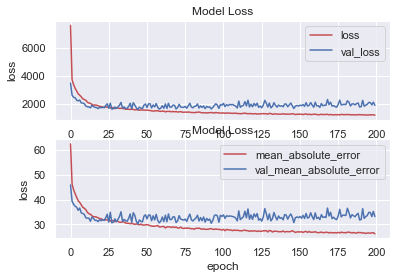

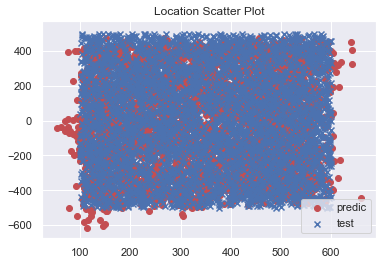

In [39]:
#plot the loss data
plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(212)
plt.plot(history.history['mean_absolute_error'],'r',label = 'mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'],'b', label = 'val_mean_absolute_error')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [40]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)

4000/4000 [==============================] - 0s 23us/step
Test loss & mean_absolute_error:  [1970.68286328125, 33.323024139404296]


error distance is  51.64279590890078
max error distance is  263.25534477309526
min error distance is  0.44881699141501374


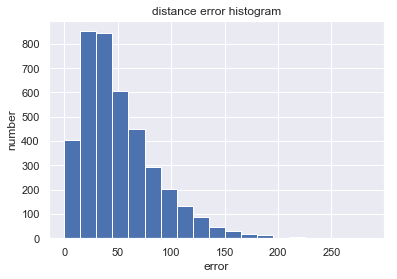

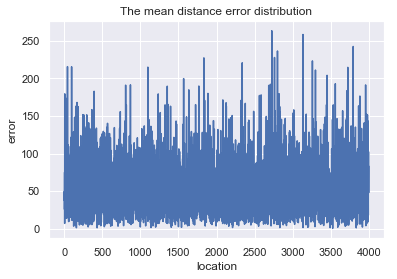

In [41]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_abs = np.abs(err)
# err_abs_mean = np.mean(err_abs)
# print(err_abs_mean)
#print(err_abs_mean.shape)
err_dis = np.sqrt(np.square(x)+np.square(y))
err_min = np.min(err_dis)
err_max = np.max(err_dis)
err_avg = np.mean(err_dis)
print("error distance is ", err_avg)
print("max error distance is ", err_max)
print("min error distance is ", err_min)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis

#plot the 2D image of error
plt.figure(1)
#plt.subplot(2,1,2)
plt.hist(err_dis, bins =  range(0,300,15)) 
plt.xlabel("error")
plt.ylabel("number")
plt.title("distance error histogram") 

plt.figure(2)
#plt.subplot(2,1,1)
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")
plt.show()


Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

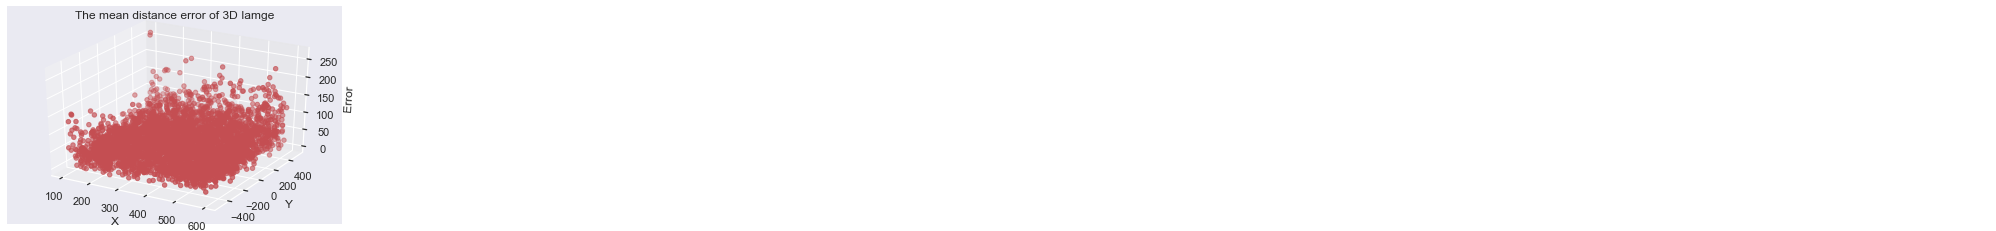

In [42]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

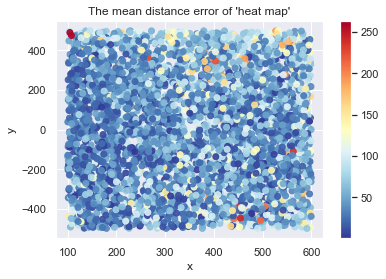

In [43]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent  RdYlBu_r RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")